# Customer Data EDA

**By [Samuel Zhao](https://www.linkedin.com/in/samuel-zhao/)**

## Summary

The customer data set has 39 columns (including customer age, income, purchase behavior, response, etc.). First, I cleaned the data and explored the data distribution and correlation. Next, I built a model to forecast the customer response probability regarding a promotion campaign. The business can use the model to target customers who are more likely to respond and save more marketing costs.

Data source: [Kaggle](https://www.kaggle.com/datasets/jackdaoud/marketing-data)

### Data Processing
- Created a boxplot for each column. According to the plots, the columns related to purchase amounts have a significant number of outliers.
- Calculated the mean and standard deviation of the columns with outliers and removed the data, which are three times standard deviations away from the mean.

### Data Distribution
- Created a histogram for each column. Except categorical data, most data have bell-shaped distribution.

### Data Correlation
- Used a cluster map to visualize the correlation between variables. The purchases of all kinds of products are highly correlated. Additionally, income and the number of kids are significantly correlated with many other variables.
- Based on catplot and regplot, age and purchase amount are positively correlated. Each age has a broad range of purchase amounts tough.

### Modeling Customer Response
- Used 'Response' as Y, and all other features as X. Based on the Random Forest outcomes, I picked 'Age', 'Complain', 'Customer_Days', 'Recency',  and 'MntTotal' as the X variables in the model.
- Fitted the train data into three models (logit, probit, and c-log-log), and compared their R-squared numbers. According to the results, probit regression may be the best model for the data, with 87% accuracy.
- Plotted a histogram of response probability. For the next campaign, the business can predict customer response probability based on their features and target customers more likely to respond. Targeting those customers rather than all customers can save more costs for the business.

## Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
food = pd.read_csv('ifood_df.csv')

## Data Processing

The dataset includes 39 columns, however
- It does not have a unique identifier for each customer, so I created a column named 'Customer ID'
- There is no total purchases of every customer, so I summed up all types of purchases and added a new column 'TotalNumPurchases'

In [5]:
food.shape

(2205, 39)

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
food.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.0,2205.0,2205.00000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,2.318367,4.100680,2.645351,5.823583,5.336961,0.073923,0.074376,0.073016,0.064399,0.013605,0.009070,3.0,11.0,0.15102,51.095692,2512.718367,0.104308,0.387302,0.216327,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,1.886107,2.737424,2.798647,3.241796,2.413535,0.261705,0.262442,0.260222,0.245518,0.115872,0.094827,0.0,0.0,0.35815,11.705801,202.563647,0.305730,0.487244,0.411833,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,24.000000,2159.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,43.000000,2339.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,50.000000,2515.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.00000,61.000000,2688.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.00000,80.000000,2858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [7]:
food.dtypes

Income                  float64
Kidhome                   int64
Teenhome                  int64
Recency                   int64
MntWines                  int64
MntFruits                 int64
MntMeatProducts           int64
MntFishProducts           int64
MntSweetProducts          int64
MntGoldProds              int64
NumDealsPurchases         int64
NumWebPurchases           int64
NumCatalogPurchases       int64
NumStorePurchases         int64
NumWebVisitsMonth         int64
AcceptedCmp3              int64
AcceptedCmp4              int64
AcceptedCmp5              int64
AcceptedCmp1              int64
AcceptedCmp2              int64
Complain                  int64
Z_CostContact             int64
Z_Revenue                 int64
Response                  int64
Age                       int64
Customer_Days             int64
marital_Divorced          int64
marital_Married           int64
marital_Single            int64
marital_Together          int64
marital_Widow             int64
educatio

In [8]:
food.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

In [9]:
food['CustomerID'] = food.index+1

In [10]:
food['TotalNumPurchases'] = food[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']].sum(axis=1)

### Outliers Processing

- I created a boxplot for each column. According to the plots, the columns related to purchase amounts have a significant number of outliers.
- I calculated the mean and standard deviation of the columns with outliers and removed the data, which are three times standard deviations away from the mean.
- I plotted the columns again to ensure they no longer contain outliers.

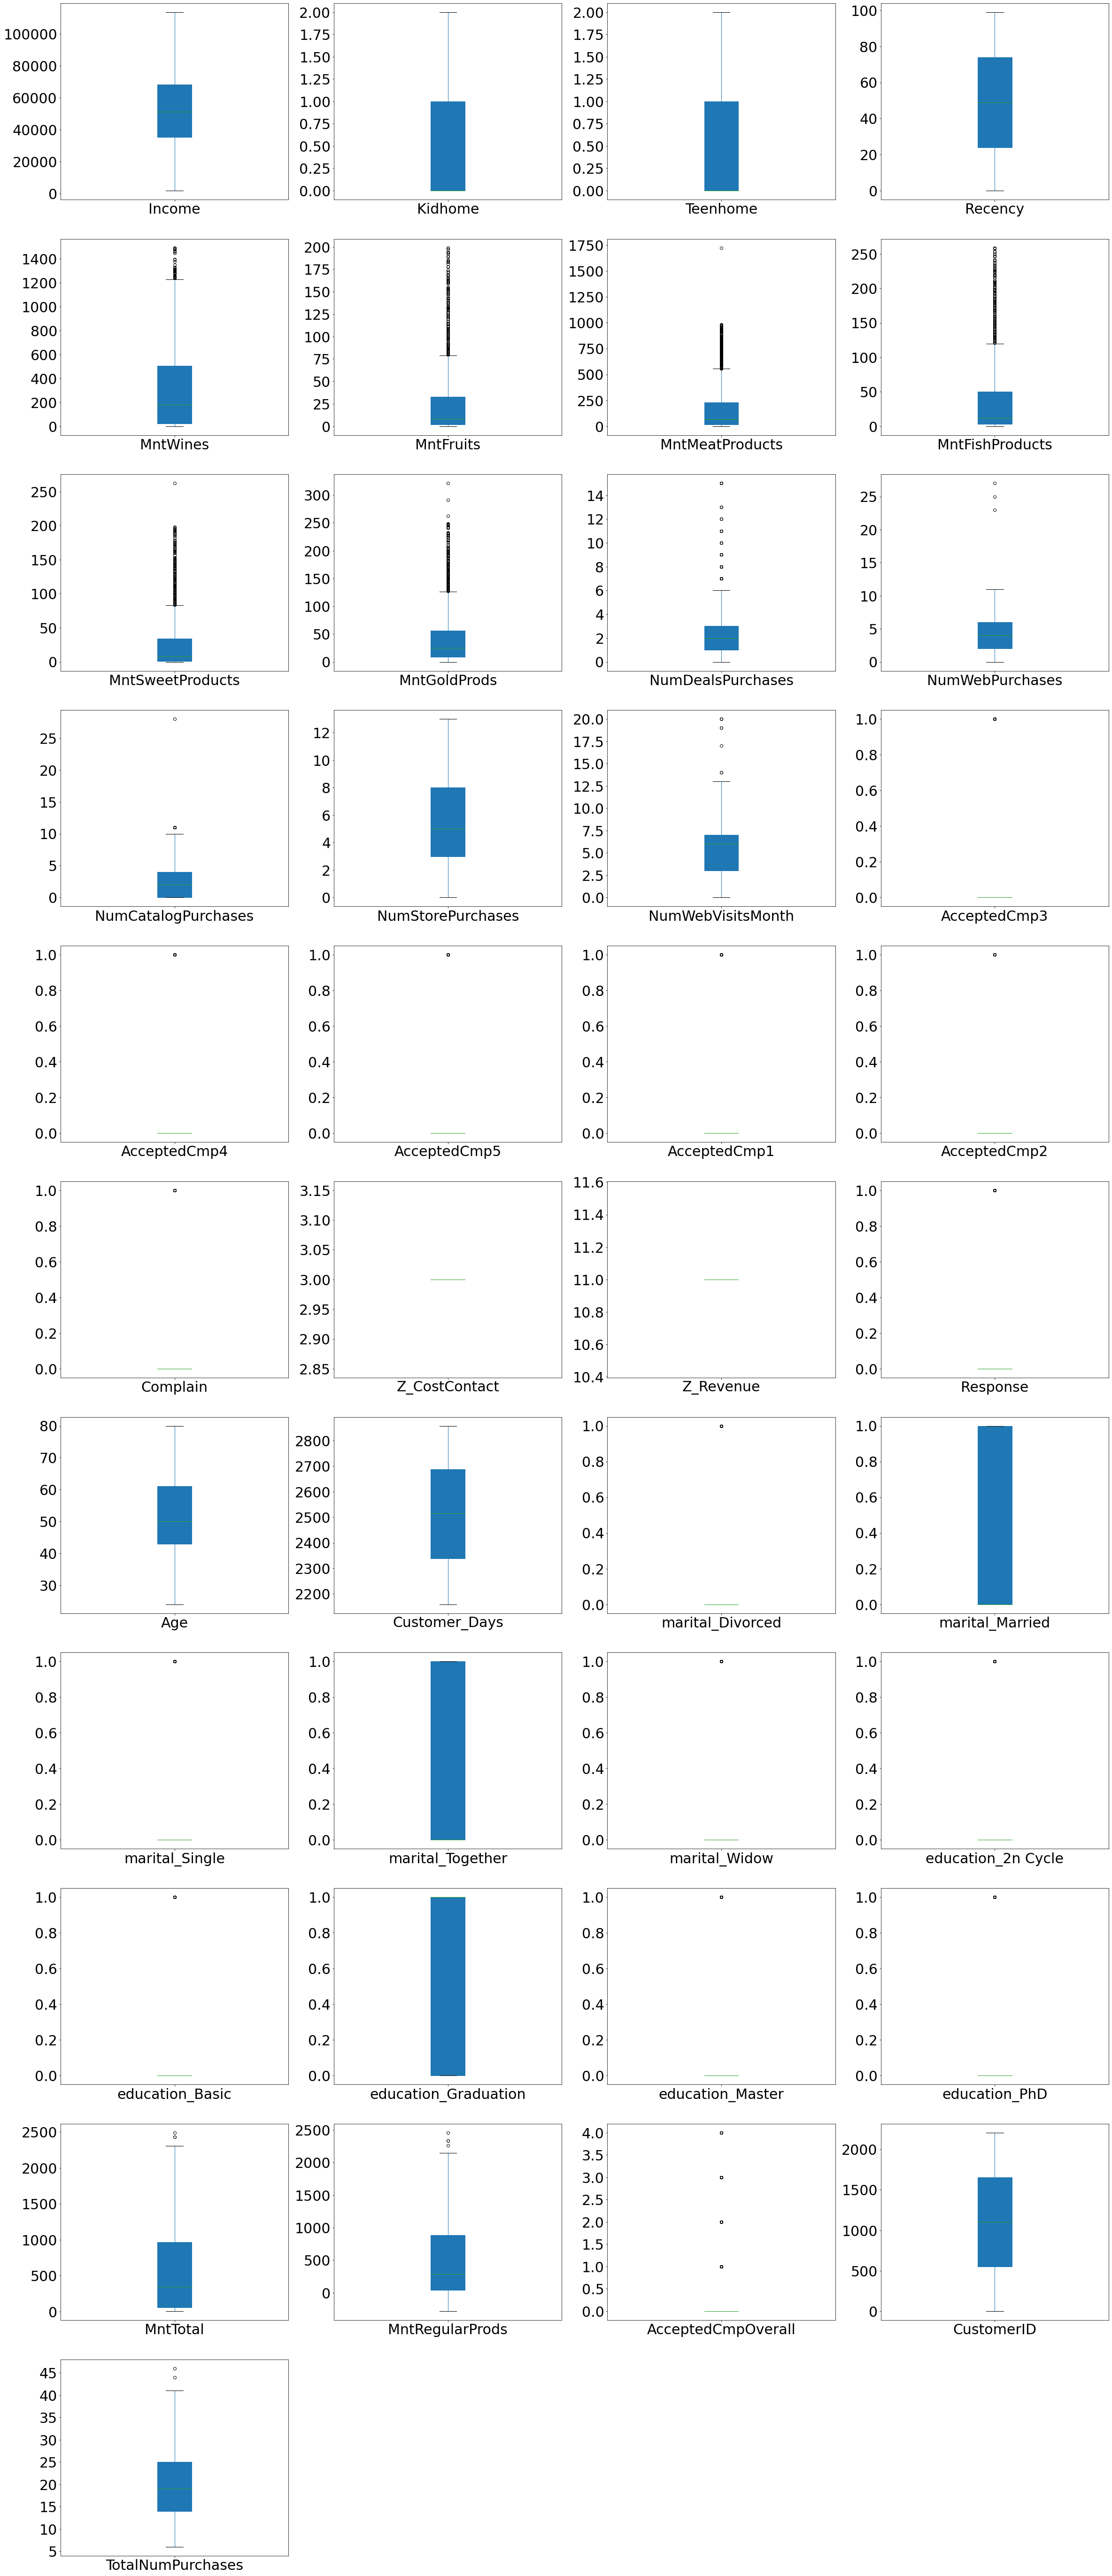

In [11]:
food.plot(kind='box', subplots=True, figsize=(40,100), layout=(11,4), patch_artist=True, fontsize=30)
plt.show()

In [12]:
outlier = ['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumWebVisitsMonth', 'MntTotal', 'MntRegularProds', 'TotalNumPurchases']
for item in outlier:
    mean = food[item].mean()
    std = food[item].std()
    food[item] = food[food[item]<= mean+3*std]

In [13]:
food.dropna(inplace=True)

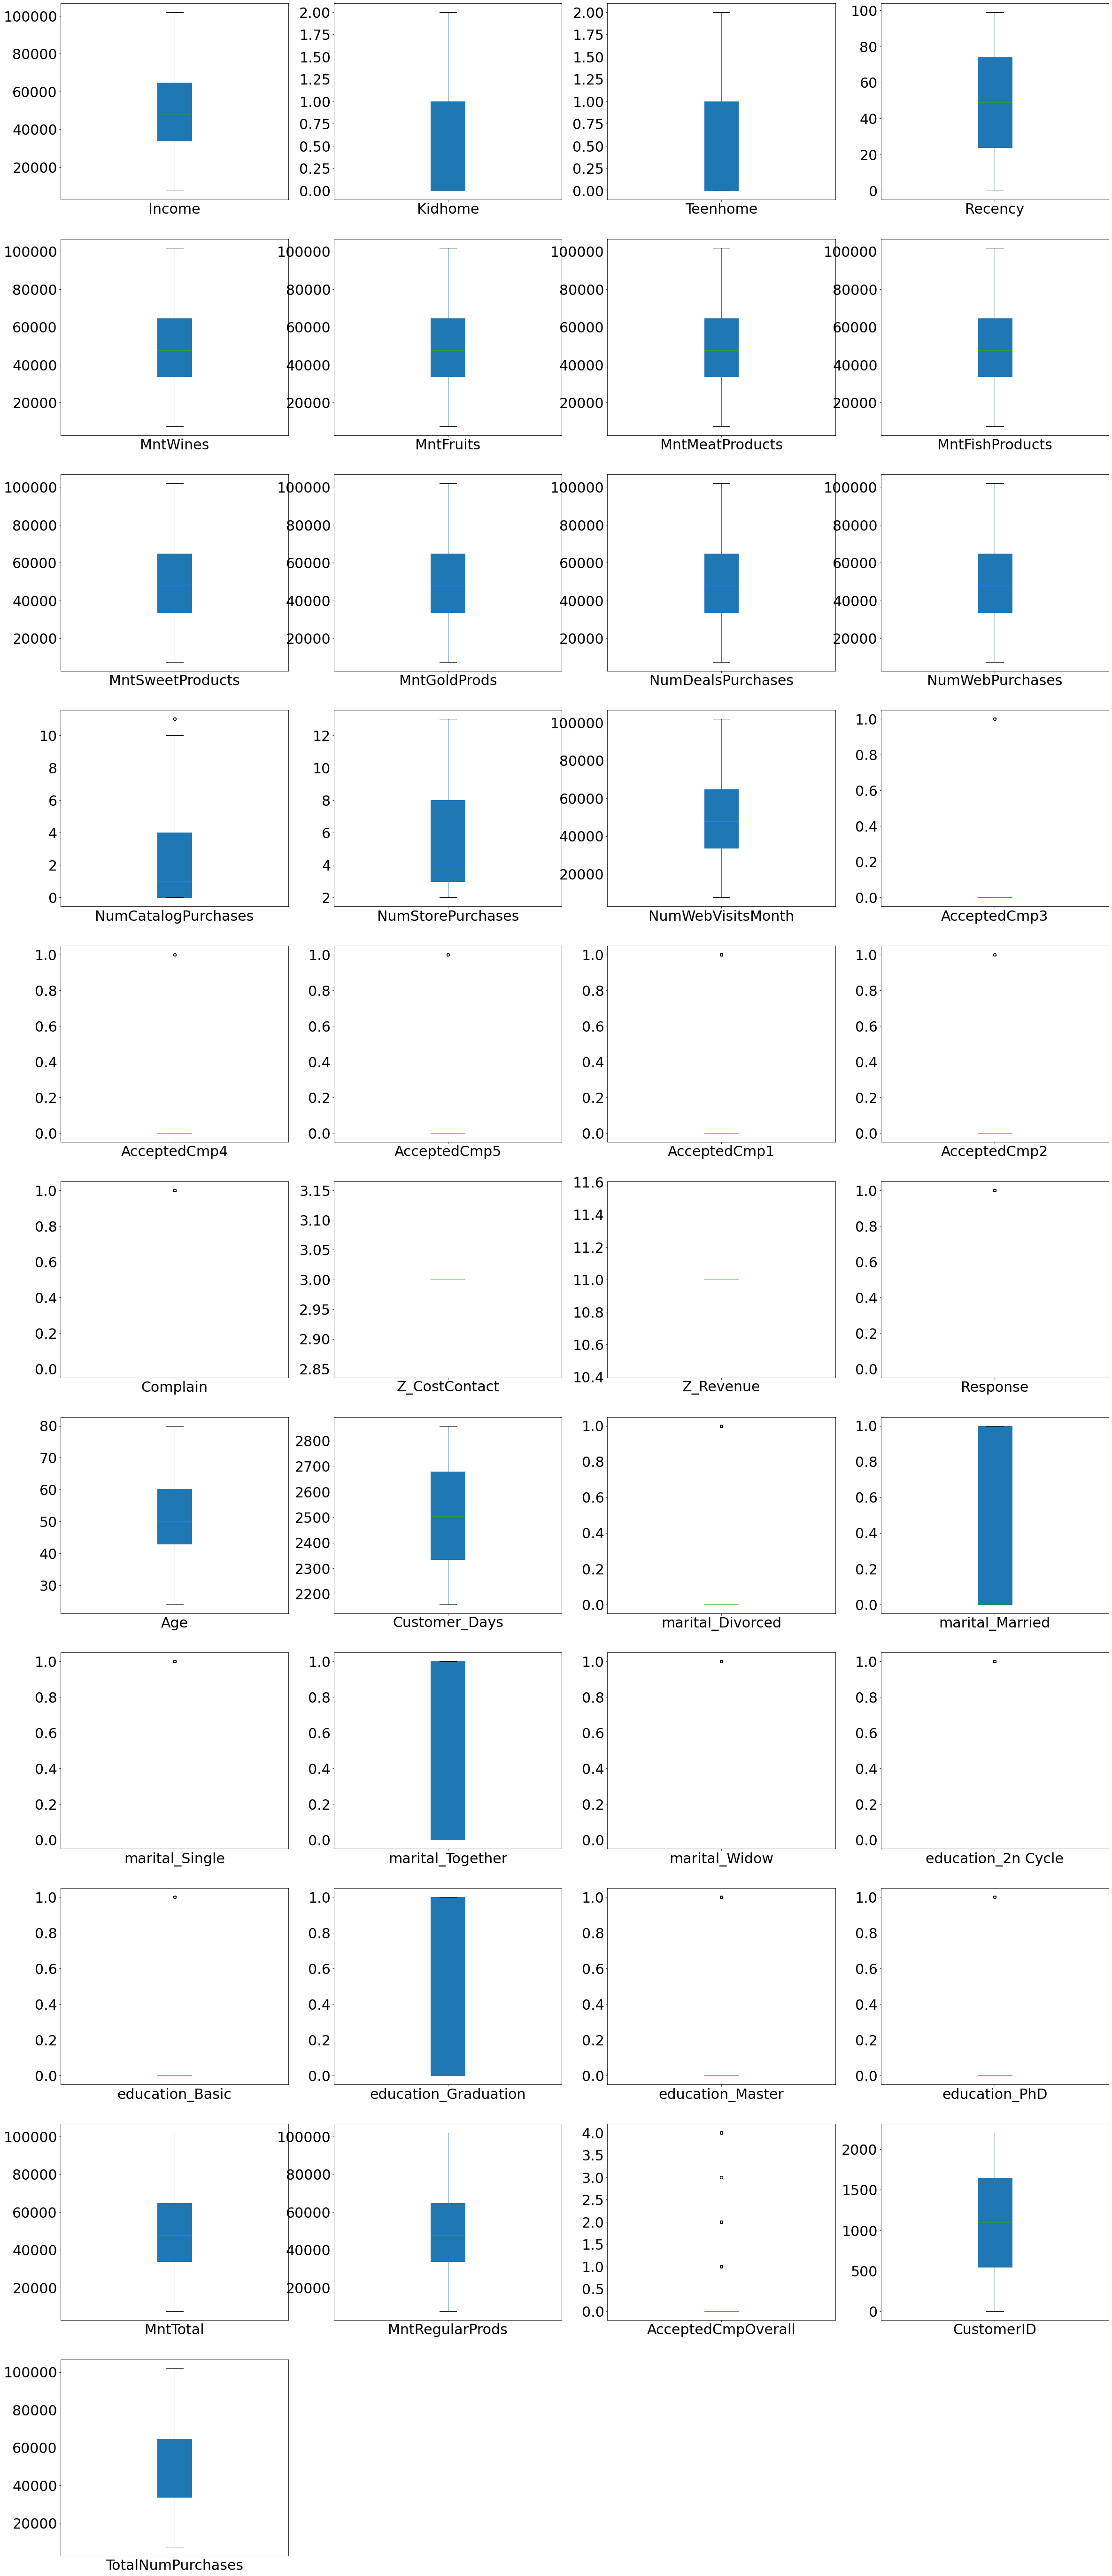

In [14]:
food.plot(kind='box', subplots=True, figsize=(40,100), layout=(11,4), patch_artist=True, fontsize=30)
plt.show()

## Data Distribution

- I created a histogram for each column. Except categorical data, most data have bell-shaped distribution.

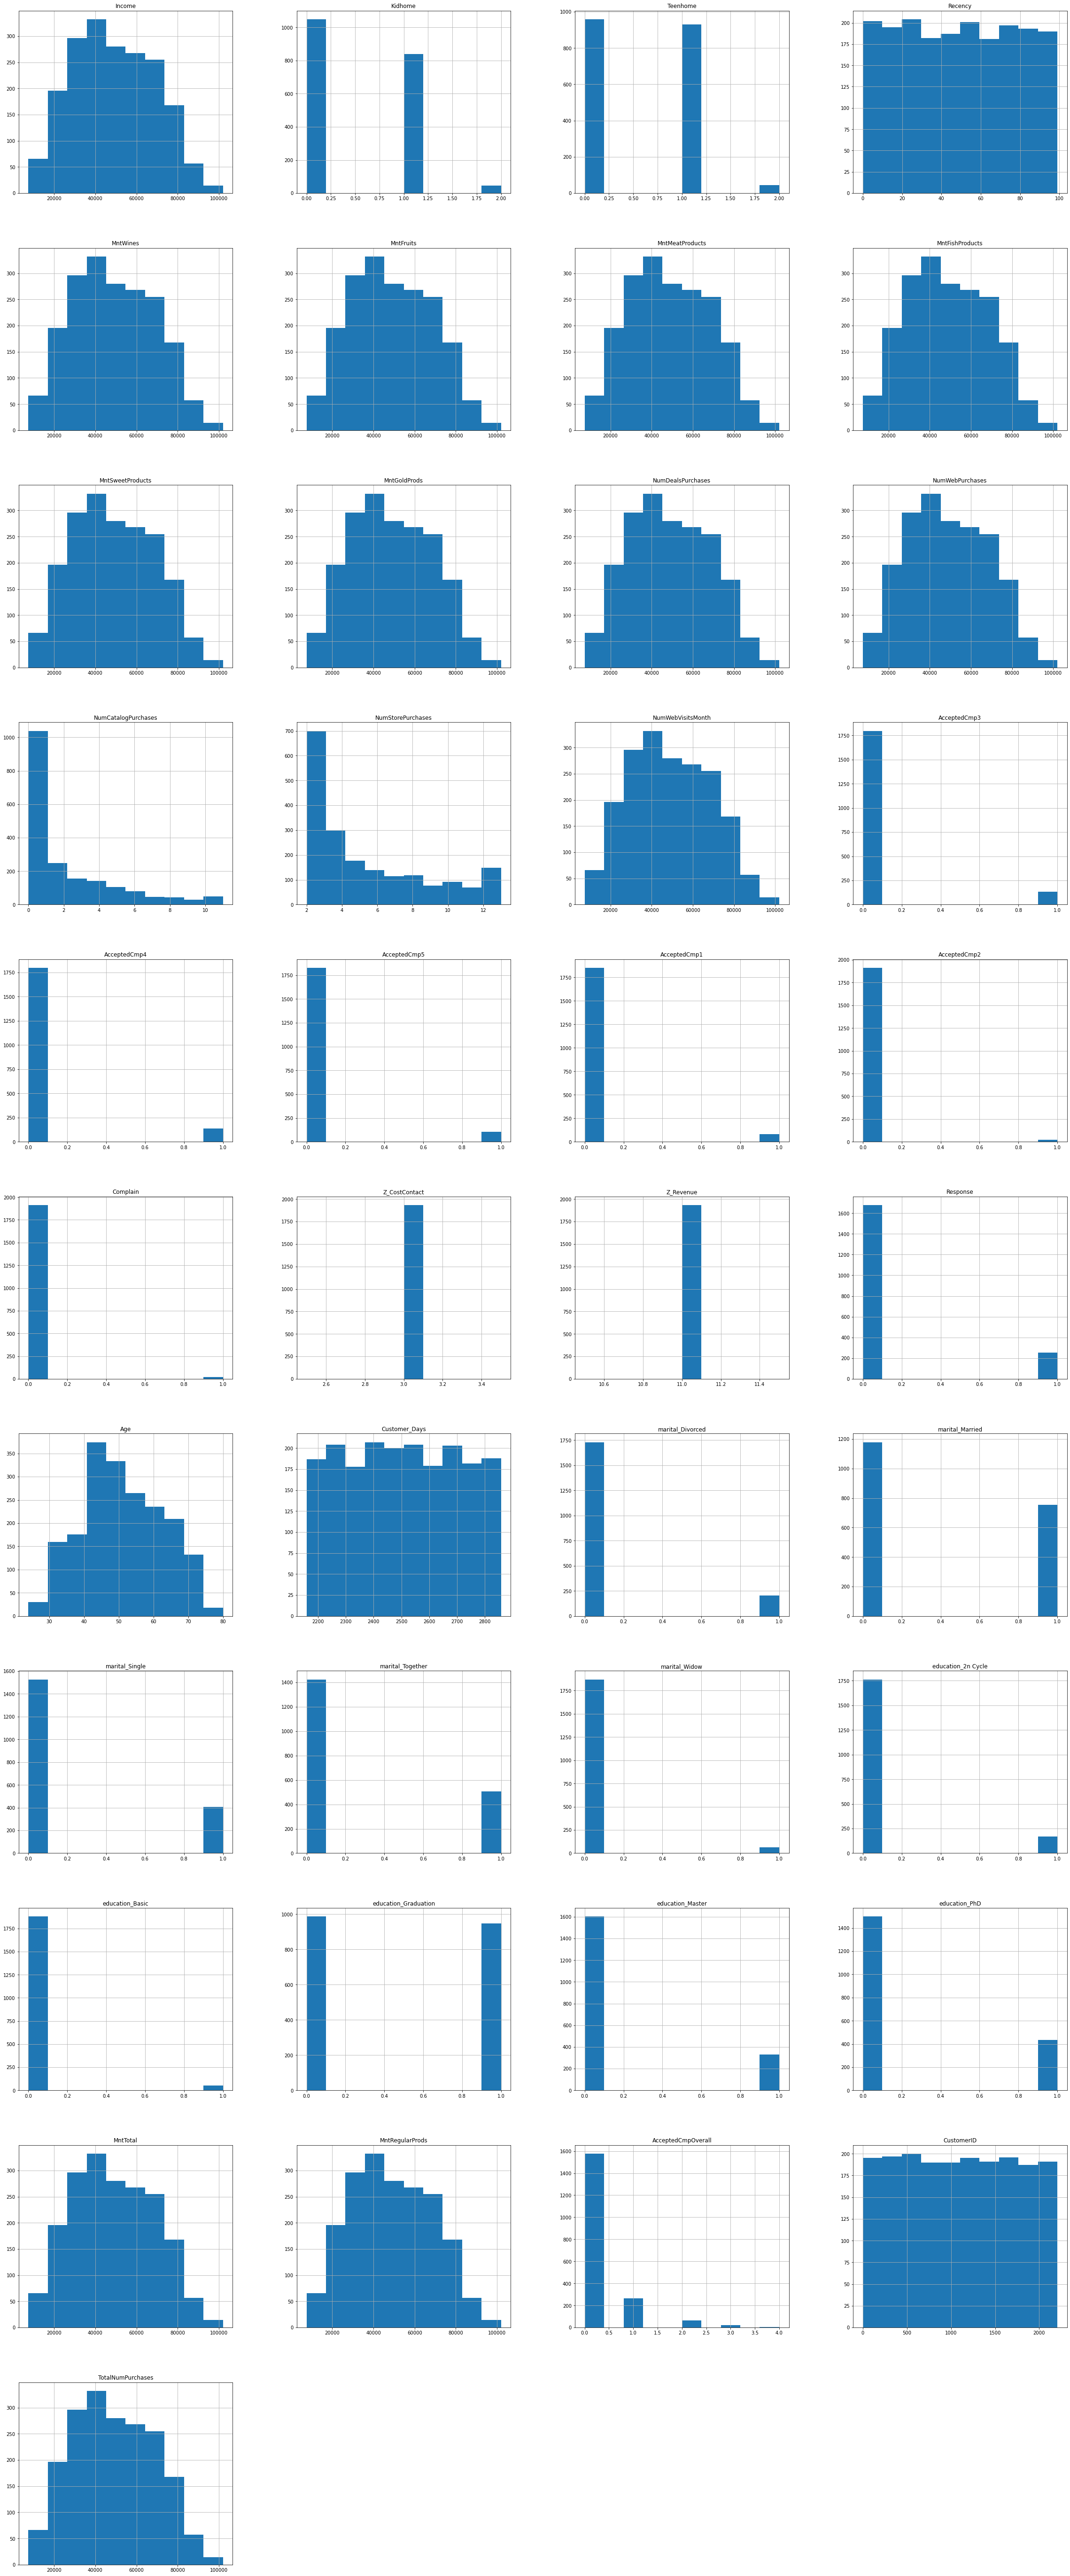

In [15]:
food.hist(figsize=(40,100), layout=(11,4))
plt.show()

## Data Correlation

- I plotted the correlation between all variables with a heatmap. I marked positively correlated with dark blue, negatively correlated with dark red, and not correlated with white.
- 'Z_CostContact' and 'Z_Revenue' have no correlation with any variables, so I dropped the columns and plotted the heatmap again.
- I used a cluster map to visualize the correlation between variables. The purchases of all kinds of products are highly correlated. Additionally, income and the number of kids are significantly correlated with many other variables.

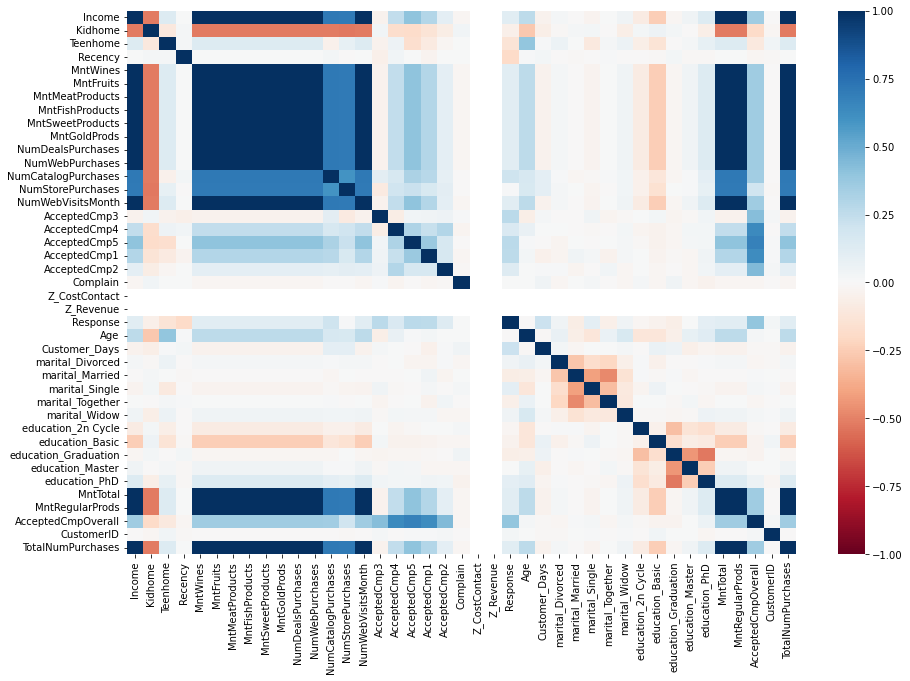

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(food.corr(), cmap='RdBu',vmin=-1, vmax=1, center=0)
plt.show()

In [17]:
food.drop(['Z_CostContact','Z_Revenue'], axis=1, inplace=True)

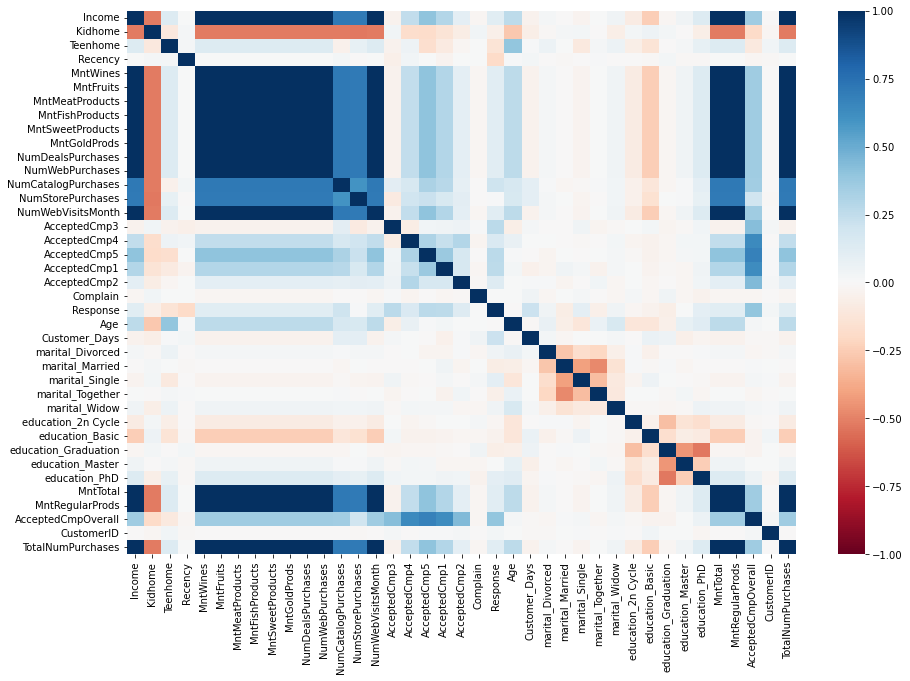

In [18]:
plt.figure(figsize=(15,10))
sns.heatmap(food.corr(), cmap='RdBu',vmin=-1, vmax=1, center=0)
plt.show()

<Figure size 2160x1440 with 0 Axes>

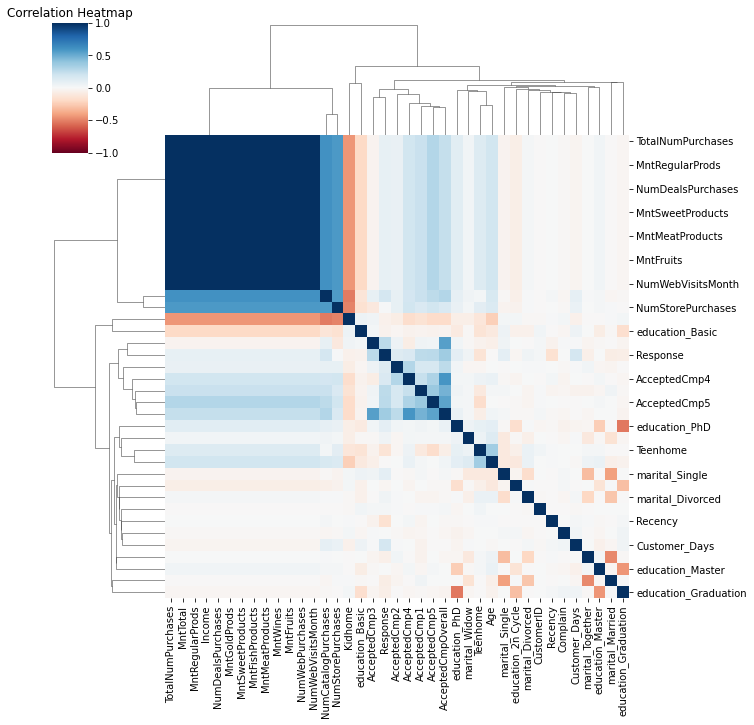

In [19]:
plt.figure(figsize = (30, 20))
sns.clustermap(food.corr(method = 'kendall'),  cmap = 'RdBu',vmin = -1, vmax = 1,center = 0)

plt.title("Correlation Heatmap")
plt.show()

- I used a catplot and regplot to find the relationship between age and purchase amount.
- Age and purchase amount are positively correlated. Each age has a broad range of purchase amounts tough.

<Figure size 1080x720 with 0 Axes>

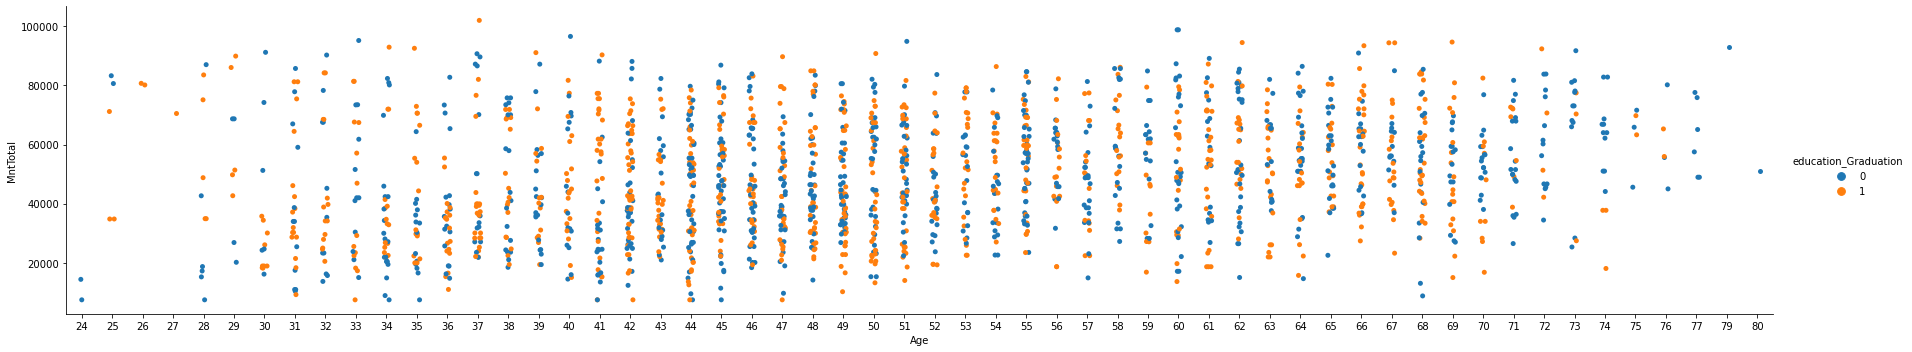

In [20]:
plt.figure(figsize=(15,10))
sns.catplot(x='Age', y='MntTotal', hue='education_Graduation',data=food, aspect=5)
plt.show()

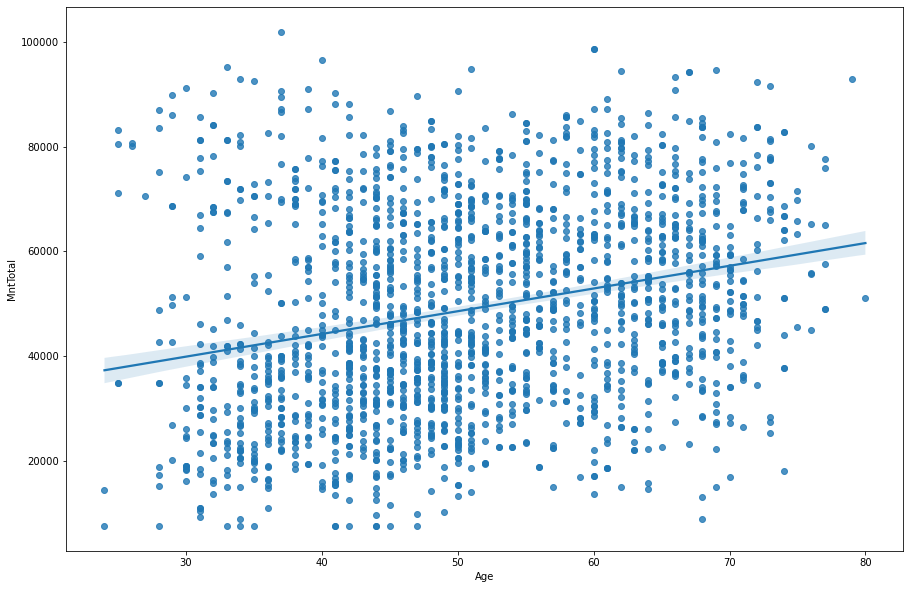

In [21]:
plt.figure(figsize=(15,10))
sns.regplot(x='Age', y='MntTotal',data=food)
plt.show()

## Modeling Customer Response

- I used 'Response' as Y, and all other features as X. Then, I split the train and test data set and set the test size as 0.3
- I used Random Forest to get the X variables that are more correlated with Y and visualized the result with a flip bar chart.
- Based on the Random Forest outcomes, I picked 'Age', 'Complain', 'Customer_Days', 'Recency',  and 'MntTotal' as the X variables in the model.

In [22]:
x = food.drop('Response', axis=1)
y = food.Response.values

In [23]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3) 

In [24]:
rg = RandomForestRegressor(n_estimators=200, n_jobs=-1)
rg.fit(X_train, y_train)
y_pred=rg.predict(X_test)

In [25]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.1728448275862069
Mean Squared Error: 0.08733586206896551
Root Mean Squared Error: 0.29552641517970185
R-squared: 0.301728247177659


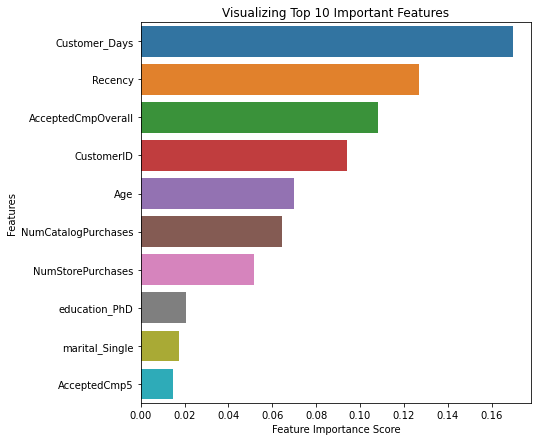

In [26]:
feature_imp = pd.Series(rg.feature_importances_,index = list(x.columns)).sort_values(ascending=False)

feature_imp = feature_imp[:10]

plt.figure(figsize = (7, 7))
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:10])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Top 10 Important Features")
plt.show()

- I fitted the train data into three models (logit, probit, and c-log-log), and compared their R-squared numbers. According to the results, probit regression may be the best model for the data.

In [27]:
x = food[['Age','Complain', 'Customer_Days', 'Recency', 'MntTotal']]
y = food['Response']

In [28]:
logit_model = sm.Logit(y, sm.add_constant(x)).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.337121
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1932
Model:                          Logit   Df Residuals:                     1926
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Mar 2023   Pseudo R-squ.:                  0.1359
Time:                        13:43:02   Log-Likelihood:                -651.32
converged:                       True   LL-Null:                       -753.77
Covariance Type:            nonrobust   LLR p-value:                 2.549e-42
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.4038      1.089    -10.469      0.000     -13.539      -9.269
Age              -0.

In [29]:
probit_model = sm.Probit(y, sm.add_constant(x)).fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.336008
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1932
Model:                         Probit   Df Residuals:                     1926
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Mar 2023   Pseudo R-squ.:                  0.1388
Time:                        13:43:02   Log-Likelihood:                -649.17
converged:                       True   LL-Null:                       -753.77
Covariance Type:            nonrobust   LLR p-value:                 3.057e-43
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -6.2270      0.564    -11.048      0.000      -7.332      -5.122
Age              -0.

In [30]:
cloglog_model = sm.GLM(y, sm.add_constant(x), family=sm.families.Binomial(sm.families.links.cloglog())).fit()
print(cloglog_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:               Response   No. Observations:                 1932
Model:                            GLM   Df Residuals:                     1926
Model Family:                Binomial   Df Model:                            5
Link Function:                cloglog   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -653.02
Date:                Fri, 10 Mar 2023   Deviance:                       1306.0
Time:                        13:43:02   Pearson chi2:                 1.75e+03
No. Iterations:                     7   Pseudo R-squ. (CS):            0.09904
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -10.4505      0.968    -10.795

- However, two variables were not statistically significant here. So I removed 'Age' and 'Complain', and reran the probit regression.
- Based on the output, the longer the days since the consumer became the customer, the customer is more likely to respond to the promotion campaign.
- I created a confusion table of the final model and checked its accuracy is 87%.

In [31]:
x = food[['Customer_Days', 'Recency', 'MntTotal']]
y = food['Response']

In [34]:
probit_model = sm.Probit(y, x).fit()
print(probit_model.summary())

Optimization terminated successfully.
         Current function value: 0.377034
         Iterations 6
                          Probit Regression Results                           
Dep. Variable:               Response   No. Observations:                 1932
Model:                         Probit   Df Residuals:                     1929
Method:                           MLE   Df Model:                            2
Date:                Fri, 10 Mar 2023   Pseudo R-squ.:                 0.03361
Time:                        13:43:44   Log-Likelihood:                -728.43
converged:                       True   LL-Null:                       -753.77
Covariance Type:            nonrobust   LLR p-value:                 9.925e-12
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Customer_Days    -0.0003   4.29e-05     -7.426      0.000      -0.000      -0.000
Recency          -0.

In [35]:
pred_probs = probit_model.predict(x)

In [36]:
pred_classes = [1 if x > 0.5 else 0 for x in pred_probs]
confusion_mat = confusion_matrix(y, pred_classes)
print(classification_report(y, pred_classes))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1677
           1       0.00      0.00      0.00       255

    accuracy                           0.87      1932
   macro avg       0.43      0.50      0.46      1932
weighted avg       0.75      0.87      0.81      1932



/Users/zhaochongxin/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhaochongxin/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhaochongxin/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


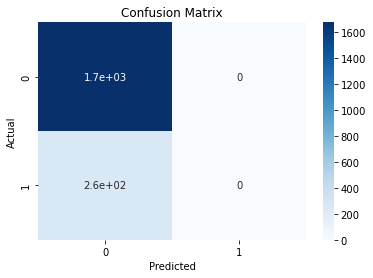

In [37]:
sns.heatmap(confusion_mat, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

- I plotted a histogram of response probability. For the next campaign, the business can predict customer response probability based on their features and target customers more likely to respond. 
- Targeting those customers rather than all customers can save more costs for the business.

In [38]:
food['PredictedResponse'] = pred_probs

Text(0.5, 1.0, 'Histogram of Predicted Response Probability')

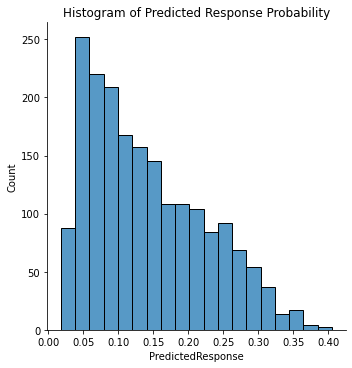

In [39]:
sns.displot(food['PredictedResponse'])
plt.title('Histogram of Predicted Response Probability')

In [40]:
food['PredictedResponse'].sum()

272.53327337205155

In [41]:
food['Response'].sum()

255